In [3]:
from pyVHR_fix.signals.video import Video
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
import cv2
from tqdm import tqdm
change_res = 480
frame_ = 500 #2000/60(fps) ≒ 33sec
size = [change_res*4//3, change_res]
duration = 2
fps = 30
print('\n','Resolution: ',size,'\n')
cap = cv2.VideoCapture(0)
video_arr = []
# 關於錄影設備的 fps(frame) 和 秒數 之間的關係，這個我還沒釐清
# 現在是用程式抓設定好的張數
# 主要capture程式呼叫函式是: 1."cv2.VideoCapture" -> 2."ret {boolean}, fm{[w,h,rgb]} = cap.read()"
def rescale_frame(frame):
    width = int(size[0])
    height = int(size[1])
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation =cv2.INTER_AREA)

for i in tqdm(range(frame_+100)):
# while True:
    if i>99:
        ret, frame = cap.read()
        if ret==True:
            # frame = rescale_frame(frame, percent=75)
            frame = cv2.flip(frame,0)
            frame = rescale_frame(frame)
            frame = cv2.rotate(frame, cv2.cv2.ROTATE_90_CLOCKWISE)
            video_arr.append(frame)
            cv2.imshow('img', frame)
            if cv2.waitKey(1) == ord('q'):
                break
            if len(video_arr)>2000:
                break
        else:
            break
cap.release()
cv2.destroyAllWindows()
print('\nfinish')

 17%|█▋        | 102/600 [00:00<00:00, 912.00it/s]
 Resolution:  [640, 480] 

100%|██████████| 600/600 [00:16<00:00, 35.94it/s]
finish



In [6]:
# cv2.imshow('img', video_arr[100])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [7]:
# get npy array
print(np.array(video_arr).shape)

# video = Video('test', video)

video = Video('test', video_arr)

(500, 640, 480, 3)


In [14]:
video.getCroppedFaces(detector='mtcnn', extractor=None)
video.printVideoInfo()
# 如果出現一些版本或是funtion warning可以無視他

pass


mtcnn



Performing face detection...
(500, 640, 480, 3)
Processing: |█████████████████████████████████████████████████-| 99.8% Complete
   * Video filename: test
         Total frames: 500
             Duration: 8.33 (sec)
           Frame rate: 60 (fps)
                Codec: raw
           Num frames: 500
               Height: 640
                Width: 640
             Detector: mtcnn
            Extractor: None


In [9]:

video.setMask(typeROI='rect', rectRegions=['forehead', 'lcheek', 'rcheek', 'nose'])
video.setMask(typeROI='skin_adapt',skinThresh_adapt=0.2)
video.setMask(typeROI='skin_fix',skinThresh_fix=[20, 50])

In [10]:
from pyVHR_fix.methods.chrom import CHROM
params = {"video": video, "verb":1, "ROImask":"skin_adapt", "skinAdapt":0.2}
m = CHROM(**params)
bpmES, timesES = m.runOffline(**params)


    * CHROM params: start time = 0.0, end time = 8.3, winsize = 5.0 (sec)
WARNING!! Found more than 2 HDIs in Hue Channel empirical Distribution... Considering only 2


In [11]:
print(bpmES, timesES)

[[126.5625    137.109375   49.21875    54.4921875  61.5234375  58.0078125
   63.28125    93.1640625 196.875    ]] [0 1 2 3 4 5 6 7 8]


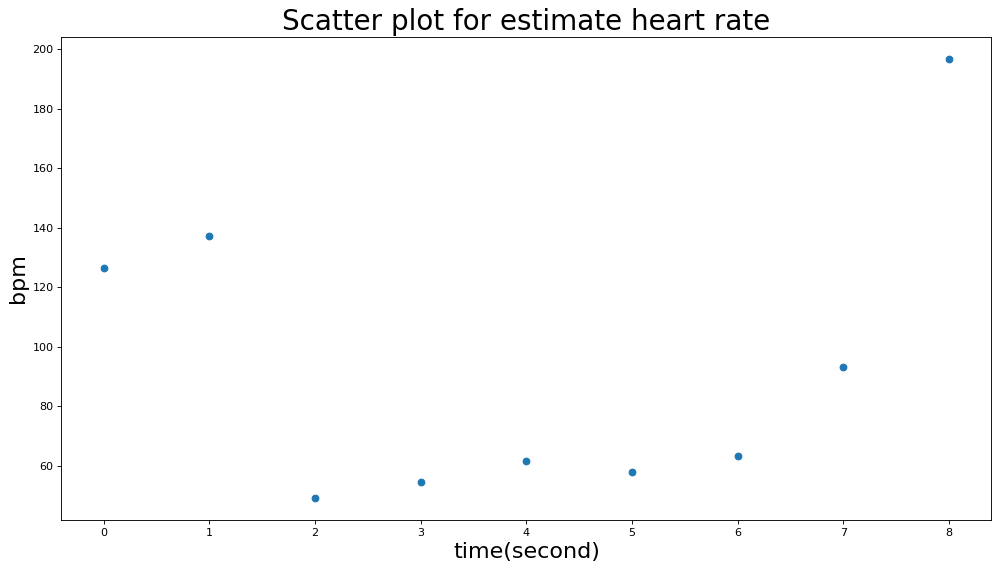

In [12]:

figure(figsize=(15,8), dpi=80)
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20
plt.scatter(timesES, bpmES)
plt.title('Scatter plot for estimate heart rate',fontsize=25)
plt.xlabel('time(second)',fontsize=20)
plt.ylabel('bpm',fontsize=20)
plt.show()
